In [1]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval() # Download the model in the cache and inference mode

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:12<00:00, 14355088.74it/s]
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 217800805/217800805 [00:02<00:00, 95033407.30it/s] 


2019-06-13 03:21:54 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.jpg" [1]


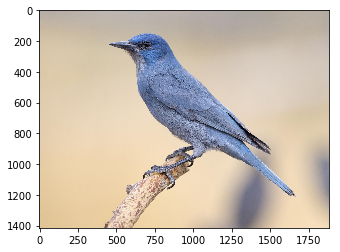

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import torch


!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.jpg
img = Image.open('./bird.jpg')
plt.imshow(img)
plt.show()

In [0]:
# Preprocess the Image
# Resize it to 256
# Normalize the image according to the mean and STD
# Convert to Tensor

# input tensor format = [batch_size, channel, width, height]
import torchvision.transforms as TF
trf= TF.Compose([TF.Resize(256), TF.CenterCrop(224), TF.ToTensor(), TF.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])

input_image = trf(img).unsqueeze(0)

In [19]:
#Forward pass of the image into the model

out = fcn(input_image)['out']
print(out.shape)

#out_put tensor size = [channels, classes, height, width]

torch.Size([1, 21, 224, 224])


In [21]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))


#Convert each image pixel into value of its corresponding classes

(224, 224)
[0 3]


In [0]:
def decode_image(image, nc=21):
  # Assign a specific color to each class
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  
  # Create numpy array of Image size with all zeros
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  # For each pixel assign color according to the label
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb
  

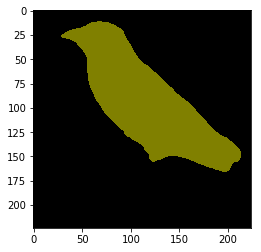

In [26]:
f = decode_image(om)
plt.imshow(f)
plt.show()